In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('Real estate.csv')

In [4]:
data.drop('No',axis=1,inplace=True)

In [6]:
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [9]:
X=data.drop('Y house price of unit area',axis=1)
y=data['Y house price of unit area']

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [127]:
scaler=StandardScaler()

In [128]:
scaler.fit(X)
scaled=scaler.transform(X)

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
linear=LinearRegression()

In [131]:
X_train, X_test, y_train, y_test = train_test_split(scaled,y,test_size=0.2,random_state=42)

In [132]:
linear.fit(X_train,y_train)

LinearRegression()

In [133]:
linear_pred=linear.predict(X_test)

In [134]:
linear.score(scaled,y)

0.5821219797424717

<Axes: xlabel='Y house price of unit area'>

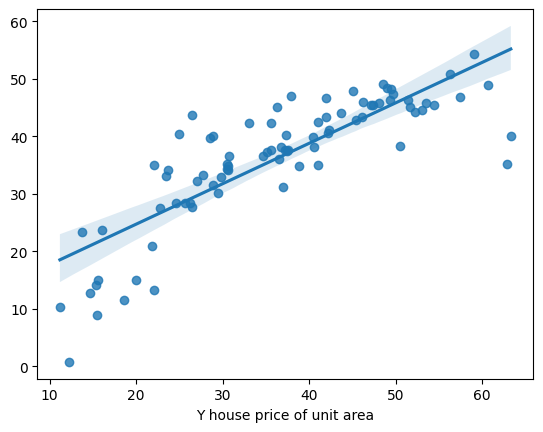

In [135]:
sns.regplot(x=y_test,y=linear_pred)

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
forest=RandomForestRegressor()

In [138]:
forest.fit(X_train,y_train)
forest_pred=forest.predict(X_test)

In [139]:
forest.score(scaled,y)

0.9160248276865699

<Axes: xlabel='Y house price of unit area'>

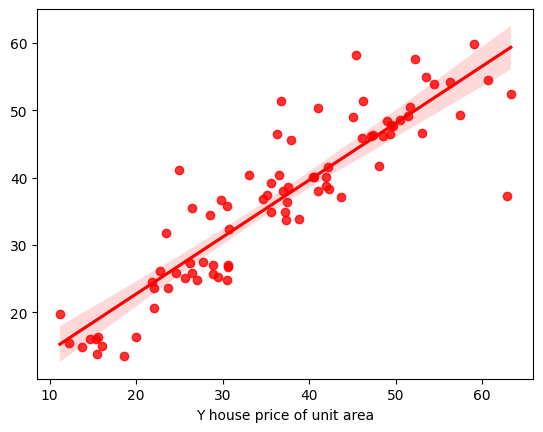

In [141]:
sns.regplot(x=y_test,y=forest_pred,color='red')